<a href="https://colab.research.google.com/github/AmrutaKoshe/Resume-Screening/blob/main/Resume_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this Resume Screening project, we need to predict the domain/department a person person belongs to by using their resume as the input

## Import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Load the dataset

In [2]:
resume = pd.read_csv("https://raw.githubusercontent.com/AmrutaKoshe/Resume-Screening/main/UpdatedResumeDataSet.csv")

### The dataset consists of 2 columns - Category, stating their domain , and their Resume in the 2nd column


In [3]:
resume

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
resume['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Count occurrences of each category


In [5]:
resume['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Operations Manager           40
Sales                        40
Mechanical Engineer          40
Blockchain                   40
Data Science                 40
ETL Developer                40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64

## Visualise number of categories

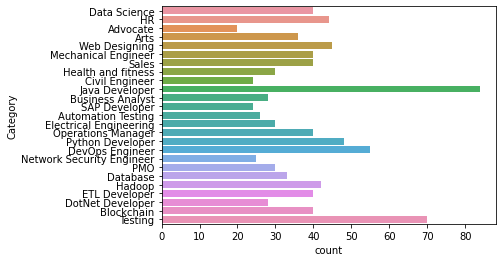

In [6]:
sns.countplot(y="Category", data=resume)

## Data Pre-processing
To remove special characters, hashtags, URLs etc

In [7]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resume['cleaned_resume'] = resume.Resume.apply(lambda x: cleanResume(x))

In [8]:
resume

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [9]:
# Print a sample original resume
print('--- Original resume ---')
print(resume['Resume'][0])

--- Original resume ---
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and 

In [10]:
# Print the same resume after text cleaning
print('--- Cleaned resume ---')
print(resume['cleaned_resume'][0])

--- Cleaned resume ---
Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assis

## Visualising common words with wordcloud

In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume['cleaned_resume'].values
cleanedSentences = ""
for i in range(len(resume)):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Tes

In [12]:
#frequency count of all the relevant present words
wordfreqdist

FreqDist({'Skills': 351,
          'Programming': 171,
          'Languages': 224,
          'Python': 573,
          'pandas': 12,
          'numpy': 12,
          'scipy': 4,
          'scikit': 12,
          'learn': 88,
          'matplotlib': 8,
          'Sql': 61,
          'Java': 773,
          'JavaScript': 229,
          'JQuery': 92,
          'Machine': 198,
          'learning': 147,
          'Regression': 82,
          'SVM': 24,
          'Na': 16,
          'Bayes': 8,
          'KNN': 16,
          'Random': 16,
          'Forest': 4,
          'Decision': 20,
          'Trees': 4,
          'Boosting': 4,
          'techniques': 73,
          'Cluster': 58,
          'Analysis': 152,
          'Word': 84,
          'Embedding': 8,
          'Sentiment': 16,
          'Natural': 15,
          'Language': 83,
          'processing': 124,
          'Dimensionality': 4,
          'reduction': 12,
          'Topic': 16,
          'Modelling': 16,
          'LDA': 8,
    

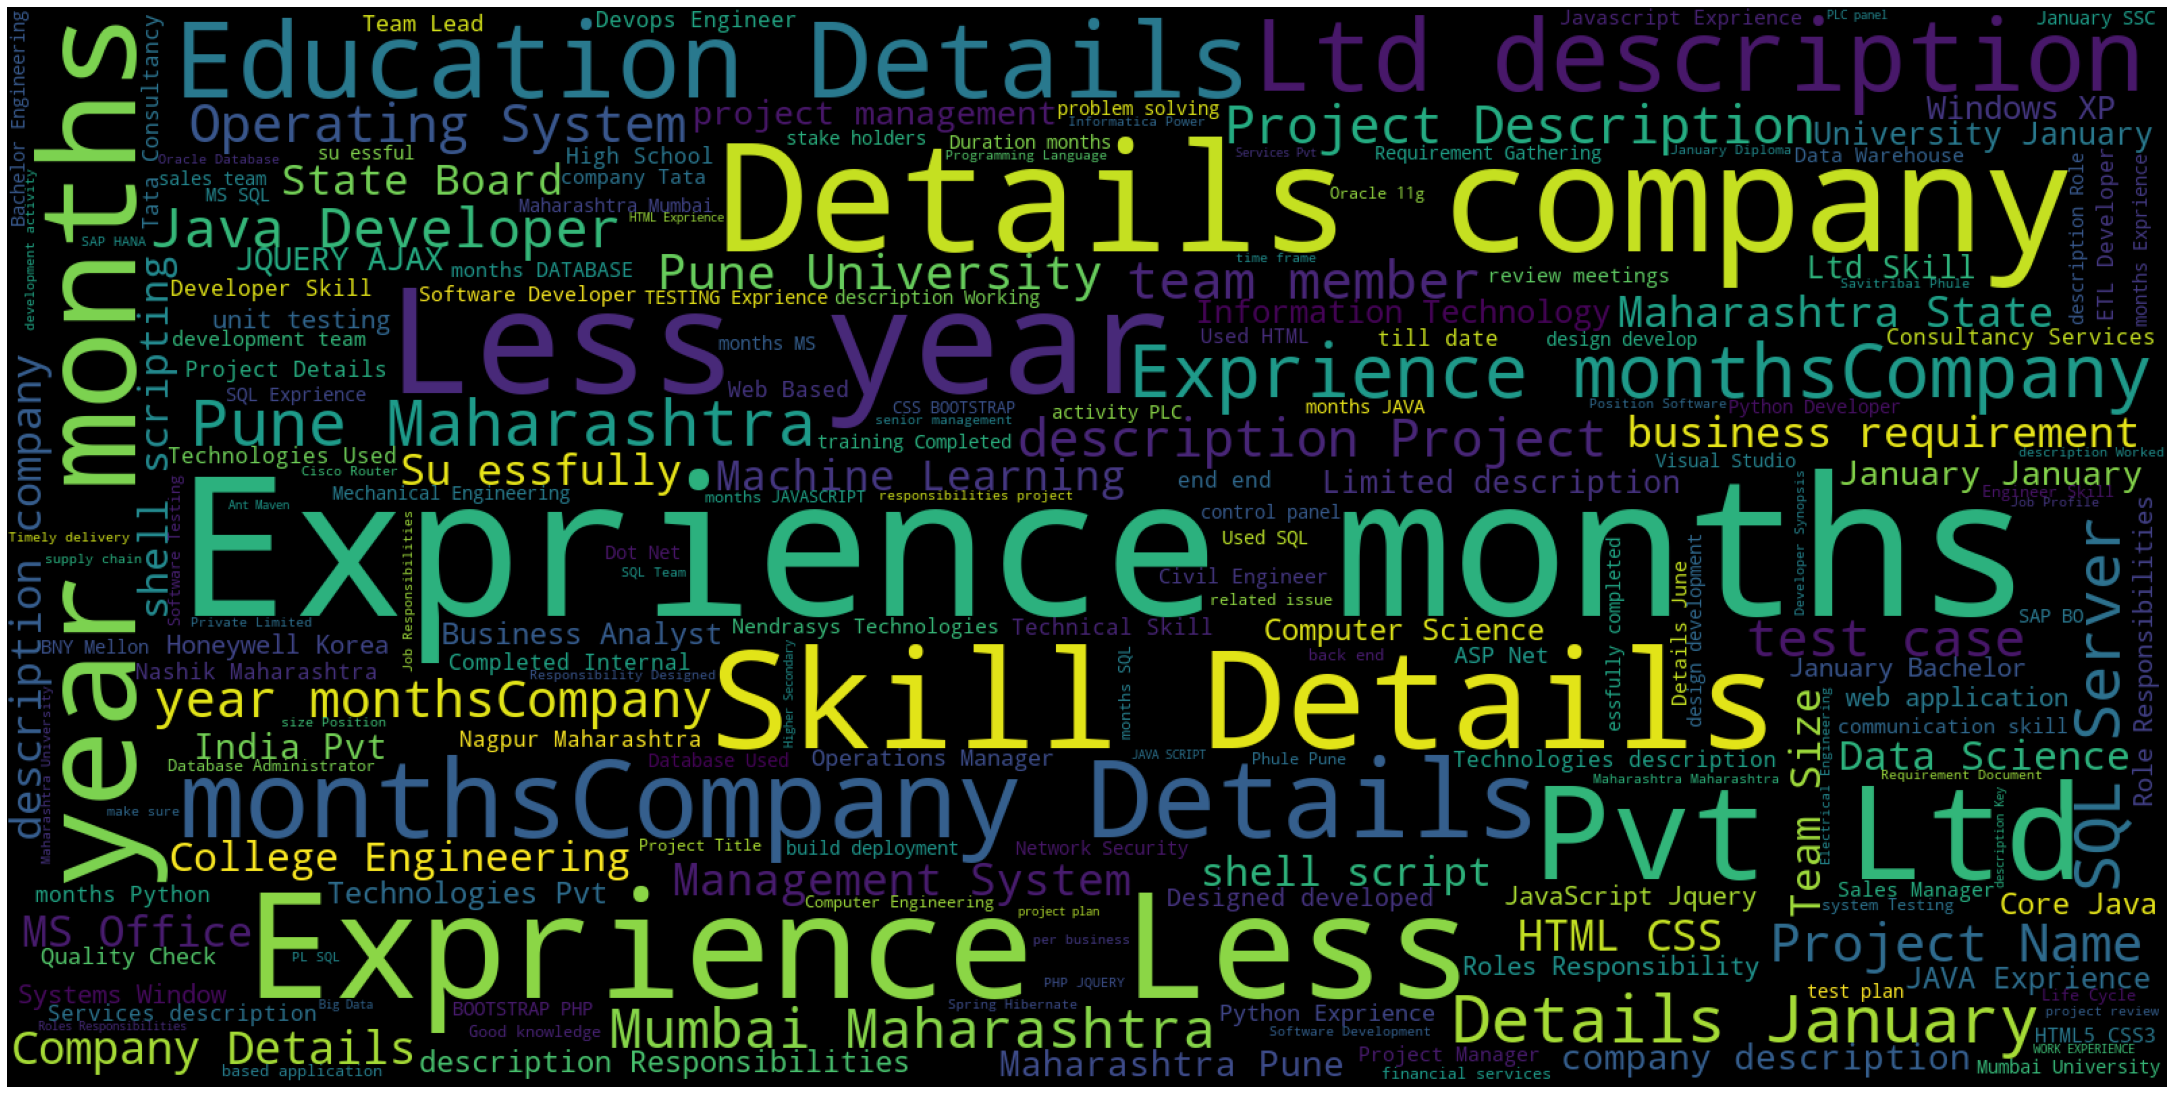

In [13]:
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate(cleanedSentences)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

## Get features and labels 

In [14]:
from sklearn.utils import shuffle


# Get features and labels from data and shuffle
features = resume['cleaned_resume'].values
original_labels = resume['Category'].values
labels = original_labels[:]

for i in range(len(resume)):
  labels[i] = str(labels[i].lower())  # convert to lowercase
  labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens

features, labels = shuffle(features, labels)

# Print example feature and label
print(features[0])
print(labels[0])

Education Details August 2010 to May 2017 BE Electronics Communication Jabalpur Madhya Pradesh Takshshila institute of technology Java developer Skill Details Java Javascript Exprience 6 monthsCompany Details company Wab It Softwere Pvt Ltd description Jr Java Developer
javadeveloper


## Split into test and train

In [15]:
# Split for train and test
train_split = 0.8
train_size = int(train_split * len(resume))

train_features = features[:train_size]
train_labels = labels[:train_size]

test_features = features[train_size:]
test_labels = labels[train_size:]

# Print size of each split
print(len(train_labels))
print(len(test_labels))

769
193


## Tokenize features and labels

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize feature data
vocab_size = 6000
oov_tok = '<>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())))

# Print example sequences from train and test datasets
train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)

{'<>': 1, 'and': 2, 'the': 3, 'of': 4, 'to': 5, 'in': 6, 'for': 7, 'exprience': 8, 'with': 9, 'company': 10, 'a': 11, 'project': 12, 'months': 13, 'description': 14, 'details': 15, 'on': 16, 'as': 17, 'data': 18, '1': 19, 'management': 20, 'team': 21, 's': 22, 'is': 23, '6': 24, 'maharashtra': 25, 'system': 26, 'testing': 27, 'year': 28, 'database': 29, 'from': 30, 'all': 31, 'development': 32, 'business': 33, 'than': 34, 'ltd': 35, 'test': 36, 'by': 37, 'less': 38, 'using': 39, 'sql': 40, 'skill': 41, 'january': 42, 'client': 43, 'java': 44, 'developer': 45, 'engineering': 46, 'application': 47, 'pune': 48, 'work': 49, 'services': 50, 'skills': 51, 'c': 52, 'software': 53, 'pvt': 54, 'education': 55, 'responsibilities': 56, 'sales': 57, 'reports': 58, 'process': 59, 'it': 60, 'operations': 61, 'requirements': 62, 'customer': 63, 'server': 64, 'technical': 65, 'technologies': 66, 'that': 67, 'university': 68, 'india': 69, '2': 70, 'i': 71, 'monthscompany': 72, 'working': 73, 'design': 

In [17]:
# Tokenize label data 
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))

# Print example label encodings from train and test datasets
train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)

test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)

{'javadeveloper': 1, 'testing': 2, 'devopsengineer': 3, 'pythondeveloper': 4, 'webdesigning': 5, 'hr': 6, 'hadoop': 7, 'operationsmanager': 8, 'blockchain': 9, 'etldeveloper': 10, 'datascience': 11, 'sales': 12, 'mechanicalengineer': 13, 'arts': 14, 'database': 15, 'electricalengineering': 16, 'healthandfitness': 17, 'pmo': 18, 'businessanalyst': 19, 'dotnetdeveloper': 20, 'automationtesting': 21, 'networksecurityengineer': 22, 'sapdeveloper': 23, 'civilengineer': 24, 'advocate': 25}


In [18]:

# Pad sequences for feature data
max_length = 300
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

# Print example padded sequences from train and test datasets
print(train_feature_padded[0])
print(test_feature_padded[0])

[  55   15  715  300    5  301  167  112  342  218 5167 1375  666 5168
  277    4   93   44   45   41   15   44  159    8   24   72   15   10
 5169   60 5170   54   35   14  844   44   45    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

## Train the Sequential model



In [19]:

# Define the neural network
embedding_dim = 64

model = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  #tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 64)             384000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 26)                1690      
Total params: 459,994
Trainable params: 459,994
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model and convert train/test data into NumPy arrays
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Features
train_feature_padded = np.array(train_feature_padded)
test_feature_padded = np.array(test_feature_padded)

# Labels
train_label_sequences = np.array(train_label_sequences)
test_label_sequences = np.array(test_label_sequences)

In [21]:
# Train the neural network
num_epochs = 12

history = model.fit(train_feature_padded, train_label_sequences, epochs=num_epochs, validation_data=(test_feature_padded, test_label_sequences), verbose=2)

Epoch 1/12
25/25 - 12s - loss: 3.2051 - accuracy: 0.0949 - val_loss: 3.1262 - val_accuracy: 0.1088
Epoch 2/12
25/25 - 8s - loss: 2.9482 - accuracy: 0.1612 - val_loss: 2.7612 - val_accuracy: 0.2021
Epoch 3/12
25/25 - 8s - loss: 2.4225 - accuracy: 0.2965 - val_loss: 2.1742 - val_accuracy: 0.4404
Epoch 4/12
25/25 - 8s - loss: 1.8235 - accuracy: 0.4837 - val_loss: 1.6069 - val_accuracy: 0.6425
Epoch 5/12
25/25 - 8s - loss: 1.3340 - accuracy: 0.6788 - val_loss: 1.2364 - val_accuracy: 0.7098
Epoch 6/12
25/25 - 8s - loss: 1.1717 - accuracy: 0.6944 - val_loss: 1.1538 - val_accuracy: 0.7358
Epoch 7/12
25/25 - 8s - loss: 0.8763 - accuracy: 0.7984 - val_loss: 0.7701 - val_accuracy: 0.8083
Epoch 8/12
25/25 - 8s - loss: 0.5974 - accuracy: 0.8479 - val_loss: 0.5651 - val_accuracy: 0.8497
Epoch 9/12
25/25 - 8s - loss: 0.4649 - accuracy: 0.9012 - val_loss: 0.4648 - val_accuracy: 0.9378
Epoch 10/12
25/25 - 8s - loss: 0.3946 - accuracy: 0.9116 - val_loss: 0.4857 - val_accuracy: 0.9119
Epoch 11/12
25/25 

In [22]:
# print example feature and its correct label
print(test_features[5])
print(test_labels[5])

Training attended 1 Su essfully completed ESD program conducted by Zensar Technologies Pune in 2017 2 Su essfully completed Employability training conducted by Barclays Global Talent Track and NASSCOM foundation in 2015 Achievements 1 Treasurer in IEEE student branch at JSCOE Pune for 2017 18 2 Worked as team leader in college s various technical and cultural events from 2016 2017 3 Project idea got selected for final prototyping round in KPIT Sparkle 2018 Pune 4 Participated in Avishkar 2017 conducted by Savitribai Phule Pune University 5 Project idea submitted in A enture Innovation 2018 Pune 6 Brought sponsorship of Rs 15 000 from Platinum Auto formerly Royal Enfield in 2017 Pune 7 Secured 1 st Rank for college level competition of Poster presentation on Smart ambulance in 2017 Pune 8 Organized IEEE workshop on Excellence in English and Public Speaking in 2017 Pune Workshops attended 1 Su essfully completed 4 days workshop on Medical IOT conducted by IEEE standard s association at V

In [23]:
score = model.evaluate(test_feature_padded, test_label_sequences, verbose=1)

7/7 [==============================] - 0s 55ms/step - loss: 0.2599 - accuracy: 0.9689


In [24]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.25987833738327026
Test Accuracy: 0.9689119458198547


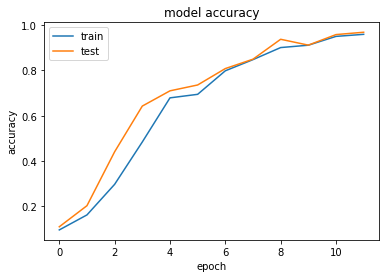

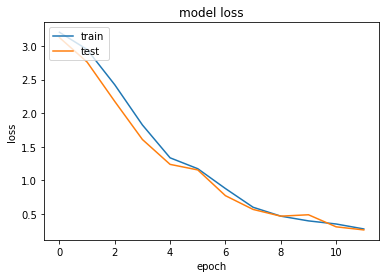

In [25]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [26]:
# let's create an array containing the previous three examples to predict and use our model to get predictions

to_predict = [test_feature_padded[3],test_feature_padded[8],test_feature_padded[17]]
prediction = model.predict_classes(np.array(to_predict))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [27]:
prediction

array([ 1, 22,  1])

In [30]:
print(test_features[3])
print(test_labels[3])
print("")
print(test_features[8])
print(test_labels[8])
print("")
print(test_features[17])
print(test_labels[17])

Education Details January 2013 Master of Engineering Information Technology Pune Maharashtra M I T January 2005 Bachelor of Engineering Information Technology Pusad Maharashtra Amravati University January 2001 Pusad Maharashtra P N Junior College January 1999 S S C Pusad Maharashtra K D High School Java Developer Java Developer Maxgen Technologies Skill Details Company Details company Maxgen Technologies description Currently working in Infrasoft Technologies Andheri as a Java Developer company MIS Generation of Tata Sky and Tata Power description COURSES DONE Android Mobile App Development Technologies in Java Core Java Advance Java JSF Hibernate Spring at NIIT in 2015 16 ANDROID PROJECT Location Detector of Computing and Mobile Devices Android ME PROJECT Data Deduplication My projects works to reduce redundant data from the system and free up the memory It stores unique copy of data and for more location with same data with the help of pointers can a ess the data Java SUBJECTS TAUGHT


### Hence, we are getting the ouput as 1, 22, 1 where 1= java developer, and 22 = netwrok securtiy engineer, according to the tokenized lables.


